# House-Prices
### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

In [2]:
df= pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/17950/865902/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605958825&Signature=GQfM%2F5Pa7M6aWlxehUJtchB%2Fn0%2FkjcF0bv30ox1MVSpHfTEyPvQje6ft6EyZZRJS5cuUuZgh%2Ba9XOC0KA0O%2BSsCo5iNz6UNifwQtay%2FID7Njhelqc63hzZBlzvpHs4QoDGilcgZvHg7VnD6hSTSyRp4dE3LhU8a9vi5aE%2FE2ne%2B9CcWQ3lTOP7gTTcZ9HFuUGCSzxC9WPnXIzicZhumcTmg5b5k0GbDFDWcpB8TmdMNzM4zJiHdSydnMO14k3U1WujxCZDsd6pONmmGVoAzDoDNH5l3Y4M5Y1yxzWoLcAizx6GBoxQJDL%2FFryi9nvJnXjQ%2BTmQy13oaNBcF4AkN1lA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv")
dft= pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/17950/865902/Test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605958751&Signature=NOIMvDuuOEwxTCGSIc08Z%2BUbcYDVHq7fGhFG4fXdFwHca6UIYDjqcDPfdSMCsbjl%2F7d13ZU5qTC0afS64P0QBXjC9IMiyA3uCkt%2FT%2Biz0W%2Fq2601Jo2yj8YYsfP9Owna%2FFeaC6hg%2FfPE5DrQ9fwcFJ%2FsLvVLGX8Zerk2qU75KYPa65pHsl324le1EcyN4b0ESXjGFiucKza73mmvurYeAjhVINpb%2BT4hHOUAVluBh2V7urH3VF3klTa2TrYhF1vm%2F2XujFPzRSMsQQ7huQagL4FYvQe5IEr1jZwbc4SA4d7%2BJwNQDQCasLkqY9xJXifKIS8kfSLeulvUHVfEDBrYAw%3D%3D&response-content-disposition=attachment%3B+filename%3DTest.csv")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis and Feature Engineering

In [5]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       177
LotArea             0
Street              0
Alley             956
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           26
BsmtCond           26
BsmtExposure       27
BsmtFinType1       26
BsmtFinSF1          0
BsmtFinType2       27
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
# Dropping data with lots of missing (single type or unavailable features) values
df.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage','FireplaceQu'],axis=1,inplace=True)
dft.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage','FireplaceQu'],axis=1,inplace=True)

In [7]:
df.iplot(y="SalePrice", x="GrLivArea", mode='markers',size=5)

In [8]:
#dropping outlier data
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index)
print('Rows and columns after dropping outliers :' , df.shape )

Rows and columns after dropping outliers : (1020, 75)


In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


### Feature engineering for categorical variables
#### Using Histogram we check for biased data. Features with heavily Biased Data Are Dropped.
#### Rest of the features, if ordinal, are asingned a number using SKlearn's Label encoder, other wise One Hot encoding is done.

In [10]:
df.MSZoning.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# The data seems to be biased to we will not use it in our analysis

In [11]:
# Dropping columns not of use
df.drop(['MSZoning'],axis=1,inplace=True)
dft.drop(['MSZoning'],axis=1,inplace=True)

In [12]:
df.Street.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# The data seems to be biased to we will not use it in our analysis

In [13]:
df.drop(['Street'],axis=1,inplace=True)
dft.drop(['Street'],axis=1,inplace=True)

In [14]:
df.LotShape.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#Seems to be usable

In [15]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['LotShape'])
df= pd.concat([df,dfn], axis=1)
df.drop(['LotShape'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['LotShape'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['LotShape'], axis = 1,inplace=True)

In [16]:
df.LandContour.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# Highly Biased

In [17]:
df.drop(['LandContour'],axis=1,inplace=True)
dft.drop(['LandContour'],axis=1,inplace=True)

In [18]:
df.Utilities.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# Dropping This

In [19]:
df.drop(['Utilities'],axis=1,inplace=True)
dft.drop(['Utilities'],axis=1,inplace=True)

In [20]:
df.LotConfig.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# keeping this

In [21]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['LotConfig'])
df= pd.concat([df,dfn], axis=1)
df.drop(['LotConfig'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['LotConfig'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['LotConfig'], axis = 1,inplace=True)

In [22]:
df.LandSlope.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# dropped

In [23]:
df.drop(['LandSlope'],axis=1,inplace=True)
dft.drop(['LandSlope'],axis=1,inplace=True)

##### In some cases the feature count is not Equal in both the sets So we check the count and then if the values are low we drop them, because if we do one hot encoding as it is it will cahange the final number of features.

In [24]:
# for next feature check if values are equal
print(df.Neighborhood.value_counts())
print(dft.Neighborhood.value_counts())

NAmes      154
CollgCr    103
OldTown     81
Edwards     66
Somerst     62
NridgHt     61
Sawyer      56
Gilbert     52
NWAmes      46
SawyerW     46
BrkSide     41
Mitchel     34
Crawfor     31
IDOTRR      29
Timber      25
NoRidge     25
ClearCr     23
StoneBr     20
SWISU       15
Blmngtn     13
MeadowV     11
BrDale      10
Veenker      8
NPkVill      6
Blueste      2
Name: Neighborhood, dtype: int64
NAmes      71
CollgCr    47
Edwards    33
OldTown    32
Gilbert    27
NWAmes     27
Somerst    24
Crawfor    20
Sawyer     18
BrkSide    17
NridgHt    16
NoRidge    16
Mitchel    15
SawyerW    13
Timber     13
SWISU      10
IDOTRR      8
BrDale      6
MeadowV     6
StoneBr     5
ClearCr     5
Blmngtn     4
NPkVill     3
Veenker     3
Name: Neighborhood, dtype: int64


In [25]:
df.drop(df[df['Neighborhood']=='Blueste'].index,axis=0,inplace=True)

In [26]:
df.Neighborhood.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# keeping this

In [27]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['Neighborhood'])
df= pd.concat([df,dfn], axis=1)
df.drop(['Neighborhood'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['Neighborhood'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['Neighborhood'], axis = 1,inplace=True)

In [28]:
df.Condition1.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# dropped

In [29]:
df.drop(['Condition1'],axis=1,inplace=True)
dft.drop(['Condition1'],axis=1,inplace=True)

In [30]:
df.Condition2.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# dropped

In [31]:
df.drop(['Condition2'],axis=1,inplace=True)
dft.drop(['Condition2'],axis=1,inplace=True)

In [32]:
df.BldgType.iplot(kind='hist',colorscale='pastel1',histfunc='count')
# dropped

In [33]:
df.drop(['BldgType'],axis=1,inplace=True)
dft.drop(['BldgType'],axis=1,inplace=True)

In [34]:
df.HouseStyle.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# dropped

In [35]:
df.drop(['HouseStyle'],axis=1,inplace=True)
dft.drop(['HouseStyle'],axis=1,inplace=True)

In [36]:
df.RoofStyle.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# dropped

In [37]:
df.drop(['RoofStyle'],axis=1,inplace=True)
dft.drop(['RoofStyle'],axis=1,inplace=True)

In [38]:
df.RoofMatl.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# dropped

In [39]:
df.drop(['RoofMatl'],axis=1,inplace=True)
dft.drop(['RoofMatl'],axis=1,inplace=True)

In [40]:
# for next feature check if values are equal
print(df.Exterior1st.value_counts())
print(dft.Exterior1st.value_counts())

VinylSd    361
HdBoard    157
MetalSd    148
Wd Sdng    147
Plywood     81
CemntBd     43
BrkFace     29
WdShing     19
Stucco      17
AsbShng     13
BrkComm      2
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    154
MetalSd     70
HdBoard     65
Wd Sdng     59
Plywood     27
BrkFace     21
CemntBd     17
Stucco       8
AsbShng      7
WdShing      7
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


In [41]:
# since they are not and they are very less in count we simply remove those rows
df['Stone'] = pd.Series([0 for x in range(len(df.index))])
df['ImStucc'] = pd.Series([0 for x in range(len(df.index))])
df['CBlock'] = pd.Series([0 for x in range(len(df.index))])
df.drop(df[df['Exterior1st']=='BrkComm'].index,axis=0,inplace=True)

In [42]:
# check again
print(df.Exterior1st.value_counts())
print(dft.Exterior1st.value_counts())
# they seem to be equal

VinylSd    361
HdBoard    157
MetalSd    148
Wd Sdng    147
Plywood     81
CemntBd     43
BrkFace     29
WdShing     19
Stucco      17
AsbShng     13
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    154
MetalSd     70
HdBoard     65
Wd Sdng     59
Plywood     27
BrkFace     21
CemntBd     17
Stucco       8
AsbShng      7
WdShing      7
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


In [43]:
df.Exterior1st.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# kept

In [44]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['Exterior1st'])
df= pd.concat([df,dfn], axis=1)
df.drop(['Exterior1st'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['Exterior1st'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['Exterior1st'], axis = 1,inplace=True)

In [45]:
# doing same with this feature
print(df.Exterior2nd.value_counts())
print(dft.Exterior2nd.value_counts())

VinylSd    355
MetalSd    145
HdBoard    143
Wd Sdng    140
Plywood    105
CmentBd     41
Wd Shng     26
Stucco      18
BrkFace     14
AsbShng     12
ImStucc      7
Brk Cmn      4
AsphShn      3
Stone        2
Other        1
Name: Exterior2nd, dtype: int64
VinylSd    149
MetalSd     67
HdBoard     64
Wd Sdng     57
Plywood     37
CmentBd     18
Wd Shng     12
BrkFace     11
AsbShng      8
Stucco       8
Stone        3
ImStucc      3
CBlock       1
Brk Cmn      1
Name: Exterior2nd, dtype: int64


In [46]:
#dropping low count ones
df['Stone'] = pd.Series([0 for x in range(len(df.index))])
df.drop(df[df['Exterior2nd']=='Other'].index,axis=0,inplace=True)
df.drop(df[df['Exterior2nd']=='AsphShn'].index,axis=0,inplace=True)

In [47]:
df.Exterior2nd.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# kept

In [48]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['Exterior2nd'])
df= pd.concat([df,dfn], axis=1)
df.drop(['Exterior2nd'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['Exterior2nd'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['Exterior2nd'], axis = 1,inplace=True)

In [49]:
df.MasVnrType.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# dropped

In [50]:
df.drop(['MasVnrType'],axis=1,inplace=True)
dft.drop(['MasVnrType'],axis=1,inplace=True)

In [51]:
df.ExterQual.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# kept

In [52]:
# odrinal variable changed to numbers
df.ExterQual = df.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
dft.ExterQual = dft.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [53]:
df.ExterCond.iplot(kind='hist',colorscale='pastel2',histfunc='count')
# dropped

In [54]:
df.drop(['ExterCond'],axis=1,inplace=True)
dft.drop(['ExterCond'],axis=1,inplace=True)

In [55]:
df.Foundation.iplot(kind='hist',colorscale='pastel2',histfunc='count')
#dropped

In [56]:
df.drop(['Foundation'],axis=1,inplace=True)
dft.drop(['Foundation'],axis=1,inplace=True)

In [57]:
df.BsmtQual.iplot(kind='hist',colorscale='pastel2',histfunc='count')
#dropped

In [58]:
df.BsmtQual=df.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
dft.BsmtQual=dft.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})

In [59]:
df.BsmtCond.iplot(kind='hist',colorscale='pastel2',histfunc='count')
#dropped

In [60]:
df.drop(['BsmtCond'],axis=1,inplace=True)
dft.drop(['BsmtCond'],axis=1,inplace=True)

In [61]:
df.BsmtExposure.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [62]:
df.BsmtExposure=df.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
dft.BsmtExposure=dft.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4}) 

In [63]:
# this one is ok
print(df.BsmtFinType1.value_counts())
print(dft.BsmtFinType1.value_counts())

Unf    296
GLQ    296
ALQ    153
BLQ     98
Rec     89
LwQ     56
Name: BsmtFinType1, dtype: int64
Unf    133
GLQ    120
ALQ     64
BLQ     50
Rec     44
LwQ     17
Name: BsmtFinType1, dtype: int64


In [64]:
df.BsmtFinType1.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [65]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['BsmtFinType1'])
df= pd.concat([df,dfn], axis=1)
df.drop(['BsmtFinType1'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['BsmtFinType1'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['BsmtFinType1'], axis = 1,inplace=True)

In [66]:
df.BsmtFinType2.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [67]:
df.drop(['BsmtFinType2'],axis=1,inplace=True)
dft.drop(['BsmtFinType2'],axis=1,inplace=True)

In [68]:
df.Heating.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [69]:
df.drop(['Heating'],axis=1,inplace=True)
dft.drop(['Heating'],axis=1,inplace=True)

In [70]:
df.HeatingQC.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [71]:
from sklearn import preprocessing
le_heat=preprocessing.LabelEncoder()
le_heat.fit(['Po','Fa','TA','Gd','Ex'])
df["HeatingQC"]=le_heat.transform(df["HeatingQC"])
le_heat=preprocessing.LabelEncoder()
le_heat.fit(['Po','Fa','TA','Gd','Ex'])
dft["HeatingQC"]=le_heat.transform(dft["HeatingQC"])

In [72]:
df.CentralAir.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [73]:
df.drop(['CentralAir'],axis=1,inplace=True)
dft.drop(['CentralAir'],axis=1,inplace=True)

In [74]:
df.Electrical.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [75]:
df.drop(['Electrical'],axis=1,inplace=True)
dft.drop(['Electrical'],axis=1,inplace=True)

In [76]:
df.KitchenQual.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [77]:
from sklearn import preprocessing
le_heat=preprocessing.LabelEncoder()
le_heat.fit(['Po','Fa','TA','Gd','Ex'])
df["KitchenQual"]=le_heat.transform(df["KitchenQual"])
le_heat=preprocessing.LabelEncoder()
le_heat.fit(['Po','Fa','TA','Gd','Ex'])
dft["KitchenQual"]=le_heat.transform(dft["KitchenQual"])

In [78]:
df.Functional.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [79]:
df.drop(['Functional'],axis=1,inplace=True)
dft.drop(['Functional'],axis=1,inplace=True)

In [80]:
df.GarageType.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [81]:
# this parameter matches too
print(df.GarageType.value_counts())
print(dft.GarageType.value_counts())

Attchd     607
Detchd     271
BuiltIn     58
Basment      9
CarPort      6
2Types       4
Name: GarageType, dtype: int64
Attchd     258
Detchd     115
BuiltIn     28
Basment     10
CarPort      3
2Types       2
Name: GarageType, dtype: int64


In [82]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['GarageType'])
df= pd.concat([df,dfn], axis=1)
df.drop(['GarageType'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['GarageType'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['GarageType'], axis = 1,inplace=True)

In [83]:
df.GarageFinish.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#kept

In [84]:
# this is also correct
print(df.GarageFinish.value_counts())
print(dft.GarageFinish.value_counts())

Unf    421
RFn    291
Fin    243
Name: GarageFinish, dtype: int64
Unf    180
RFn    131
Fin    105
Name: GarageFinish, dtype: int64


In [85]:
# getting dummies to use it for training
dfn=pd.get_dummies(df['GarageFinish'])
df= pd.concat([df,dfn], axis=1)
df.drop(['GarageFinish'], axis = 1,inplace=True)
dfy=pd.get_dummies(dft['GarageFinish'])
dft= pd.concat([dft,dfy], axis=1)
dft.drop(['GarageFinish'], axis = 1,inplace=True)

In [86]:
df.GarageQual.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [87]:
df.drop(['GarageQual'],axis=1,inplace=True)
dft.drop(['GarageQual'],axis=1,inplace=True)

In [88]:
df.GarageCond.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [89]:
df.drop(['GarageCond'],axis=1,inplace=True)
dft.drop(['GarageCond'],axis=1,inplace=True)

In [90]:
df.PavedDrive.iplot(kind='hist',colorscale='pastel1',histfunc='count')
#dropped

In [91]:
df.drop(['PavedDrive'],axis=1,inplace=True)
dft.drop(['PavedDrive'],axis=1,inplace=True)

In [92]:
df.drop(['MSSubClass'],axis=1,inplace=True)
dft.drop(['MSSubClass'],axis=1,inplace=True)

In [93]:
df.drop(['SaleType'],axis=1,inplace=True)
dft.drop(['SaleType'],axis=1,inplace=True)
df.drop(['SaleCondition'],axis=1,inplace=True)
dft.drop(['SaleCondition'],axis=1,inplace=True)

In [94]:
print(df.shape)
print(dft.shape)

(1012, 116)
(439, 115)


In [95]:
# Sale type and Sale condition will not be predetermined so they are dropped

### Analysing Feaures with continious data
#### We check for Correlation and Scatter plots and if the feature does not have a good corelation of shows poor trend in scatter plot we drop it. We also check to see that residual plot of our features does not shows any trend and use Box plot for Interval Data.

            LotArea  SalePrice
LotArea    1.000000   0.266036
SalePrice  0.266036   1.000000


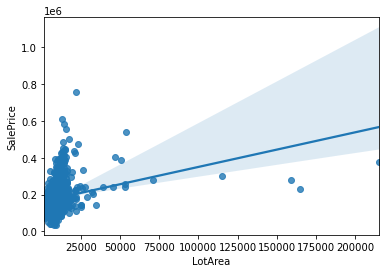

In [96]:
#plotting regression plots with price for individual features
print(df[['LotArea','SalePrice']].corr())
sns.regplot(x='LotArea',y='SalePrice',data=df)

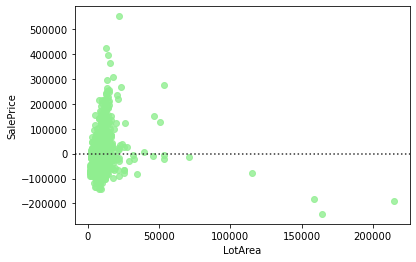

In [97]:
# Residual Plot
sns.residplot(x='LotArea',y='SalePrice',data=df, color='lightgreen')

In [98]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['LotArea'],axis=1,inplace=True)
dft.drop(['LotArea'],axis=1,inplace=True)

           YearBuilt  SalePrice
YearBuilt   1.000000   0.529174
SalePrice   0.529174   1.000000


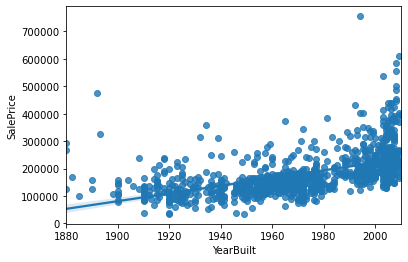

In [99]:
#plotting regression plots with price for individual features
print(df[['YearBuilt','SalePrice']].corr())
sns.regplot(x='YearBuilt',y='SalePrice',data=df)
#kept

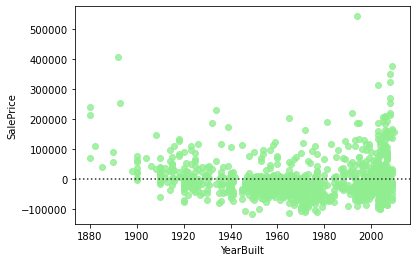

In [100]:
# Residual Plot
sns.residplot(x='YearBuilt',y='SalePrice',data=df, color='lightgreen')

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.526496
SalePrice         0.526496   1.000000


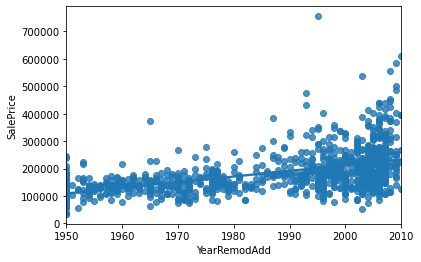

In [101]:
#plotting regression plots with price for individual features
print(df[['YearRemodAdd','SalePrice']].corr())
sns.regplot(x='YearRemodAdd',y='SalePrice',data=df)
#kept

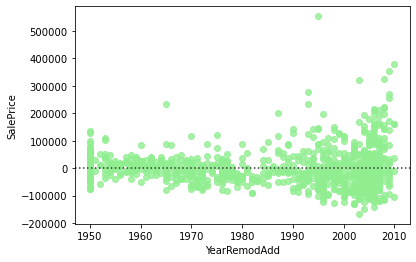

In [102]:
# Residual Plot
sns.residplot(x='YearRemodAdd',y='SalePrice',data=df, color='lightgreen')

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.494438
SalePrice     0.494438   1.000000


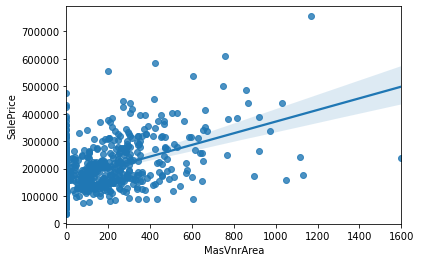

In [103]:
#plotting regression plots with price for individual features
print(df[['MasVnrArea','SalePrice']].corr())
sns.regplot(x='MasVnrArea',y='SalePrice',data=df)

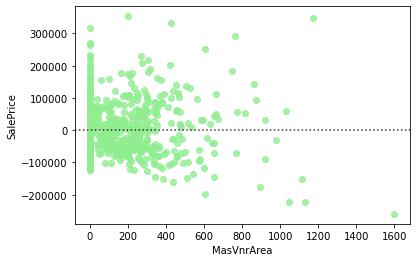

In [104]:
# Residual Plot
sns.residplot(x='MasVnrArea',y='SalePrice',data=df, color='lightgreen')

In [105]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['MasVnrArea'],axis=1,inplace=True)
dft.drop(['MasVnrArea'],axis=1,inplace=True)

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.387676
SalePrice     0.387676   1.000000


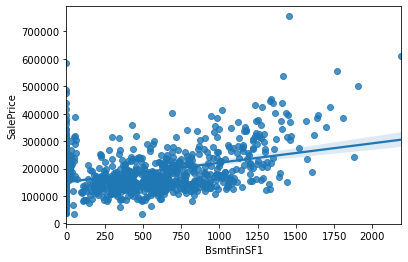

In [106]:
#plotting regression plots with price for individual features
print(df[['BsmtFinSF1','SalePrice']].corr())
sns.regplot(x='BsmtFinSF1',y='SalePrice',data=df)

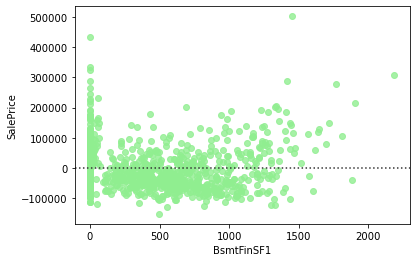

In [107]:
# Residual Plot
sns.residplot(x='BsmtFinSF1',y='SalePrice',data=df, color='lightgreen')

In [108]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BsmtFinSF1'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1'],axis=1,inplace=True)

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.002405
SalePrice    -0.002405   1.000000


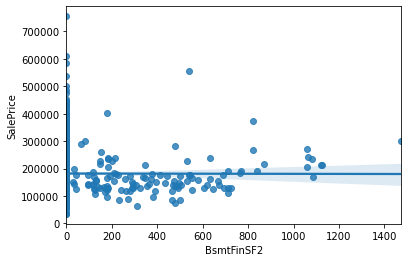

In [109]:
#plotting regression plots with price for individual features
print(df[['BsmtFinSF2','SalePrice']].corr())
sns.regplot(x='BsmtFinSF2',y='SalePrice',data=df)

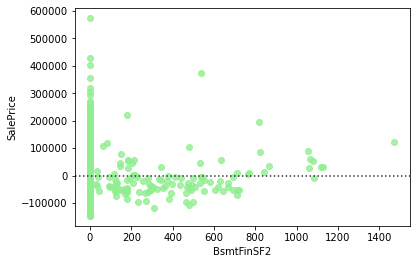

In [110]:
# Residual Plot
sns.residplot(x='BsmtFinSF2',y='SalePrice',data=df, color='lightgreen')

In [111]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BsmtFinSF2'],axis=1,inplace=True)
dft.drop(['BsmtFinSF2'],axis=1,inplace=True)

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.222687
SalePrice   0.222687   1.000000


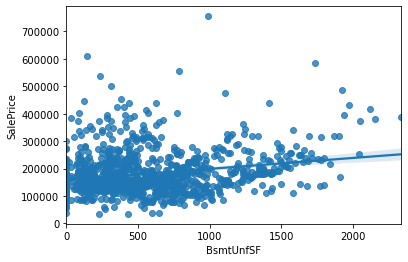

In [112]:
#plotting regression plots with price for individual features
print(df[['BsmtUnfSF','SalePrice']].corr())
sns.regplot(x='BsmtUnfSF',y='SalePrice',data=df)

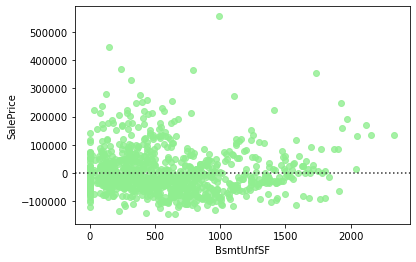

In [113]:
# Residual Plot
sns.residplot(x='BsmtUnfSF',y='SalePrice',data=df, color='lightgreen')

In [114]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtUnfSF'],axis=1,inplace=True)

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.646863
SalePrice       0.646863   1.000000


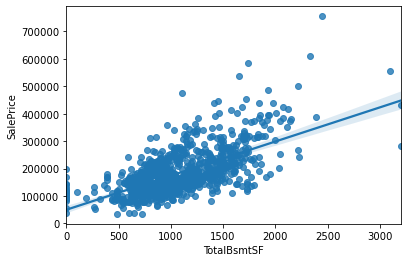

In [115]:
#plotting regression plots with price for individual features
print(df[['TotalBsmtSF','SalePrice']].corr())
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=df)
#kept

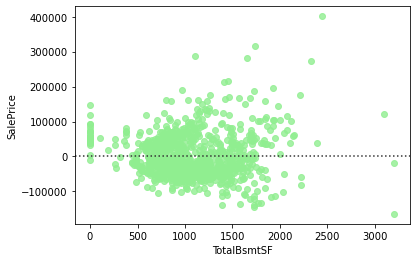

In [116]:
# Residual Plot
sns.residplot(x='TotalBsmtSF',y='SalePrice',data=df, color='lightgreen')

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.634455
SalePrice  0.634455   1.000000


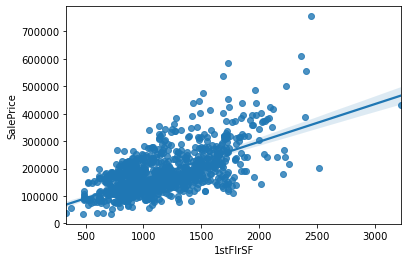

In [117]:
#plotting regression plots with price for individual features
print(df[['1stFlrSF','SalePrice']].corr())
sns.regplot(x='1stFlrSF',y='SalePrice',data=df)
#kept

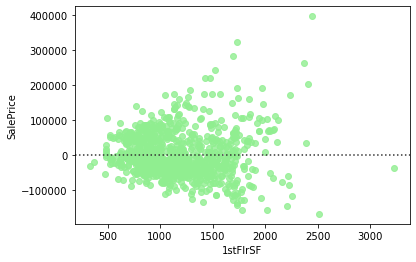

In [118]:
# Residual Plot
sns.residplot(x='1stFlrSF',y='SalePrice',data=df, color='lightgreen')

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.328506
SalePrice  0.328506   1.000000


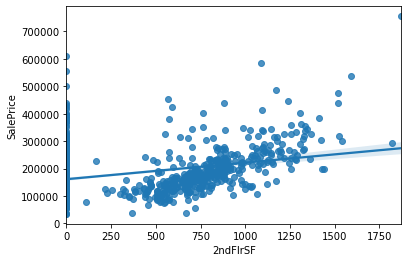

In [119]:
#plotting regression plots with price for individual features
print(df[['2ndFlrSF','SalePrice']].corr())
sns.regplot(x='2ndFlrSF',y='SalePrice',data=df)
#dropped

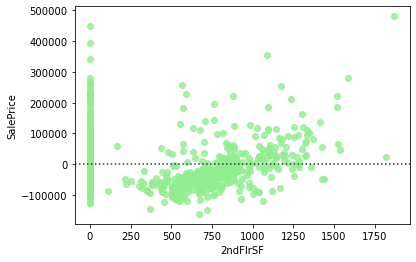

In [120]:
# Residual Plot
sns.residplot(x='2ndFlrSF',y='SalePrice',data=df, color='lightgreen')

In [121]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['2ndFlrSF'],axis=1,inplace=True)
dft.drop(['2ndFlrSF'],axis=1,inplace=True)

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.036363
SalePrice        -0.036363   1.000000


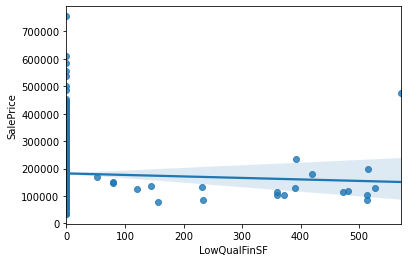

In [122]:
#plotting regression plots with price for individual features
print(df[['LowQualFinSF','SalePrice']].corr())
sns.regplot(x='LowQualFinSF',y='SalePrice',data=df)
#dropped

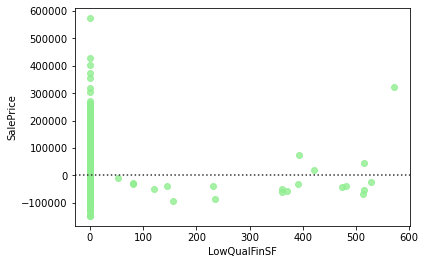

In [123]:
# Residual Plot
sns.residplot(x='LowQualFinSF',y='SalePrice',data=df, color='lightgreen')

In [124]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['LowQualFinSF'],axis=1,inplace=True)
dft.drop(['LowQualFinSF'],axis=1,inplace=True)

           GrLivArea  SalePrice
GrLivArea   1.000000   0.749594
SalePrice   0.749594   1.000000


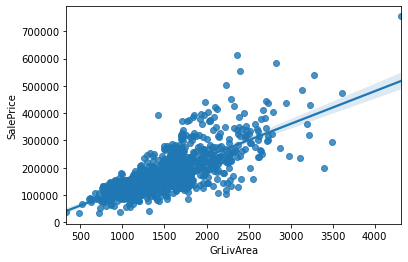

In [125]:
#plotting regression plots with price for individual features
print(df[['GrLivArea','SalePrice']].corr())
sns.regplot(x='GrLivArea',y='SalePrice',data=df)
#kept

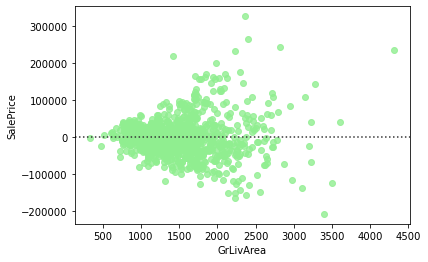

In [126]:
# Residual Plot
sns.residplot(x='GrLivArea',y='SalePrice',data=df, color='lightgreen')

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.214957
SalePrice         0.214957   1.000000


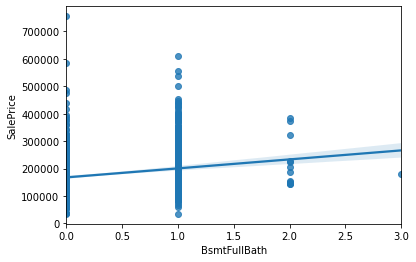

In [127]:
#plotting regression plots with price for individual features
print(df[['BsmtFullBath','SalePrice']].corr())
sns.regplot(x='BsmtFullBath',y='SalePrice',data=df)
#dropped

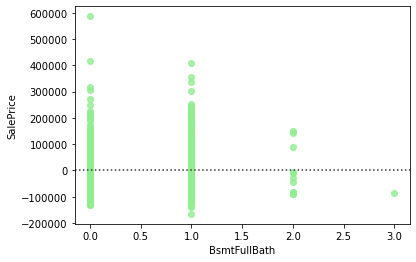

In [128]:
# Residual Plot
sns.residplot(x='BsmtFullBath',y='SalePrice',data=df, color='lightgreen')

In [129]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BsmtFullBath'],axis=1,inplace=True)
dft.drop(['BsmtFullBath'],axis=1,inplace=True)

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.006956
SalePrice        -0.006956   1.000000


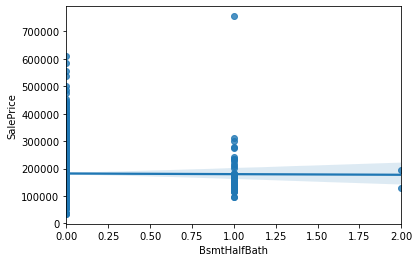

In [130]:
#plotting regression plots with price for individual features
print(df[['BsmtHalfBath','SalePrice']].corr())
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=df)
#dropped

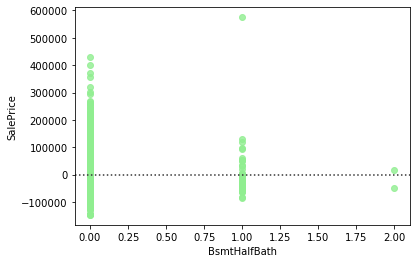

In [131]:
# Residual Plot
sns.residplot(x='BsmtHalfBath',y='SalePrice',data=df, color='lightgreen')

In [132]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BsmtHalfBath'],axis=1,inplace=True)
dft.drop(['BsmtHalfBath'],axis=1,inplace=True)

           FullBath  SalePrice
FullBath   1.000000   0.558891
SalePrice  0.558891   1.000000


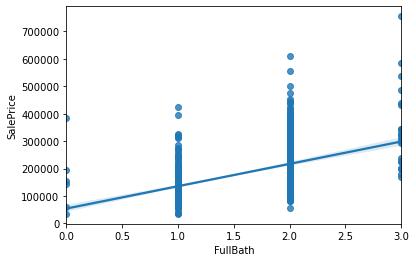

In [133]:
#plotting regression plots with price for individual features
print(df[['FullBath','SalePrice']].corr())
sns.regplot(x='FullBath',y='SalePrice',data=df)
#further investigation

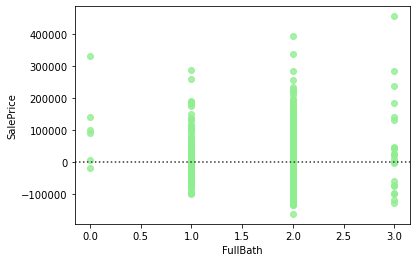

In [134]:
# Residual Plot
sns.residplot(x='FullBath',y='SalePrice',data=df, color='lightgreen')

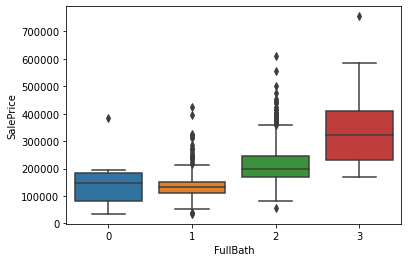

In [135]:
sns.boxplot(x='FullBath',y='SalePrice',data=df)
#kept

           HalfBath  SalePrice
HalfBath   1.000000   0.306739
SalePrice  0.306739   1.000000


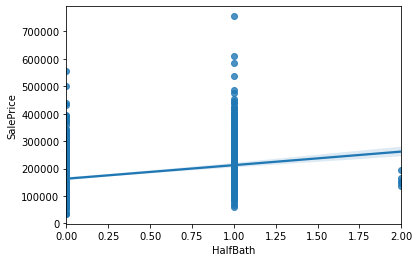

In [136]:
#plotting regression plots with price for individual features
print(df[['HalfBath','SalePrice']].corr())
sns.regplot(x='HalfBath',y='SalePrice',data=df)
#dropped

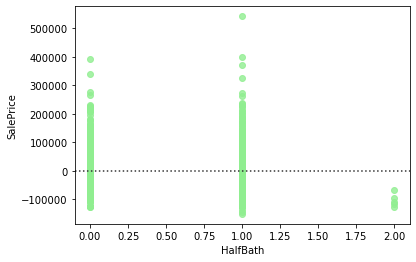

In [137]:
# Residual Plot
sns.residplot(x='HalfBath',y='SalePrice',data=df, color='lightgreen')

In [138]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['HalfBath'],axis=1,inplace=True)
dft.drop(['HalfBath'],axis=1,inplace=True)

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.170564
SalePrice         0.170564   1.000000


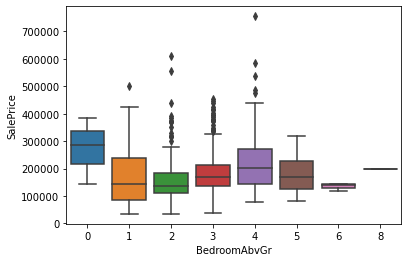

In [139]:
#plotting regression plots with price for individual features
print(df[['BedroomAbvGr','SalePrice']].corr())
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=df)
#dropped

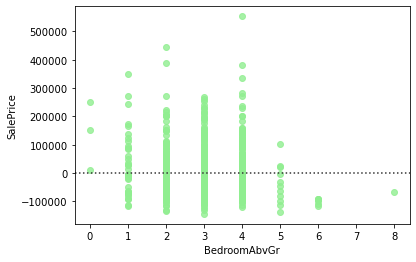

In [140]:
# Residual Plot
sns.residplot(x='BedroomAbvGr',y='SalePrice',data=df, color='lightgreen')

In [141]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['BedroomAbvGr'],axis=1,inplace=True)
dft.drop(['BedroomAbvGr'],axis=1,inplace=True)

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.133044
SalePrice        -0.133044   1.000000


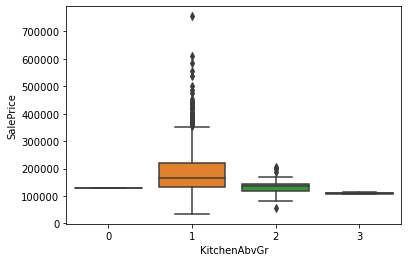

In [142]:
#plotting regression plots with price for individual features
print(df[['KitchenAbvGr','SalePrice']].corr())
sns.boxplot(x='KitchenAbvGr',y='SalePrice',data=df)
#dropped

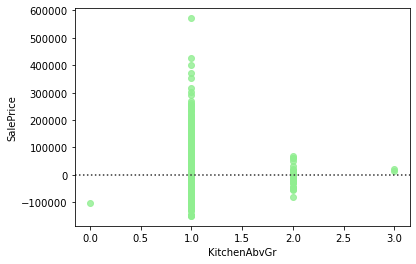

In [143]:
# Residual Plot
sns.residplot(x='KitchenAbvGr',y='SalePrice',data=df, color='lightgreen')

In [144]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['KitchenAbvGr'],axis=1,inplace=True)
dft.drop(['KitchenAbvGr'],axis=1,inplace=True)

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.570066
SalePrice         0.570066   1.000000


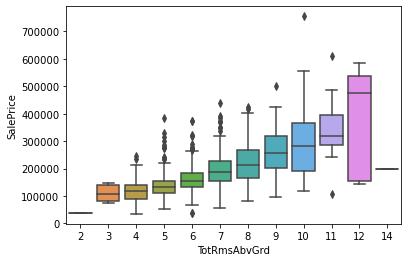

In [145]:
#plotting regression plots with price for individual features
print(df[['TotRmsAbvGrd','SalePrice']].corr())
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df)
#kept

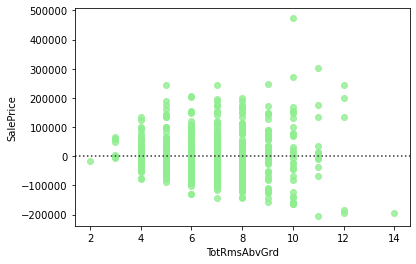

In [146]:
# Residual Plot
sns.residplot(x='TotRmsAbvGrd',y='SalePrice',data=df, color='lightgreen')

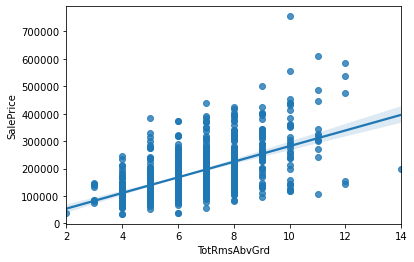

In [147]:
sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

            Fireplaces  SalePrice
Fireplaces    1.000000   0.471898
SalePrice     0.471898   1.000000


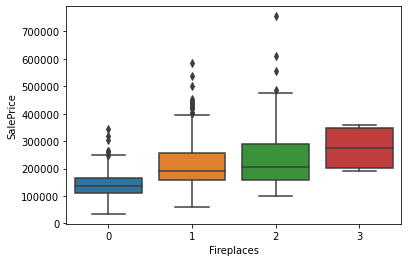

In [148]:
#plotting regression plots with price for individual features
print(df[['Fireplaces','SalePrice']].corr())
sns.boxplot(x='Fireplaces',y='SalePrice',data=df)
#dropped

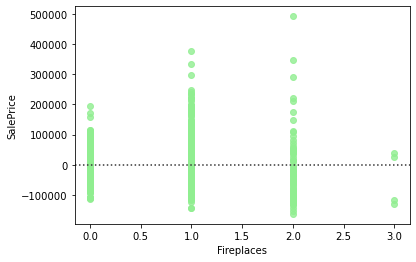

In [149]:
# Residual Plot
sns.residplot(x='Fireplaces',y='SalePrice',data=df, color='lightgreen')

In [150]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['Fireplaces'],axis=1,inplace=True)
dft.drop(['Fireplaces'],axis=1,inplace=True)

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.494978
SalePrice       0.494978   1.000000


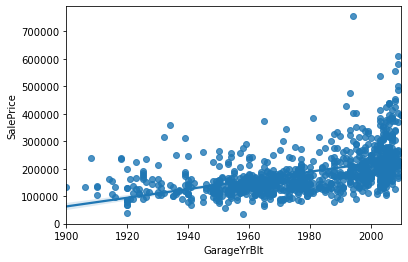

In [151]:
#plotting regression plots with price for individual features
print(df[['GarageYrBlt','SalePrice']].corr())
sns.regplot(x='GarageYrBlt',y='SalePrice',data=df)
#kept

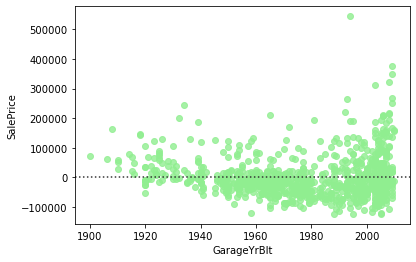

In [152]:
# Residual Plot
sns.residplot(x='GarageYrBlt',y='SalePrice',data=df, color='lightgreen')

            GarageArea  SalePrice
GarageArea    1.000000   0.649695
SalePrice     0.649695   1.000000


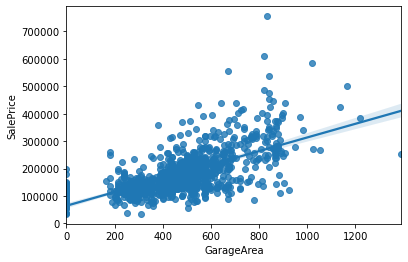

In [153]:
#plotting regression plots with price for individual features
print(df[['GarageArea','SalePrice']].corr())
sns.regplot(x='GarageArea',y='SalePrice',data=df)
#kept

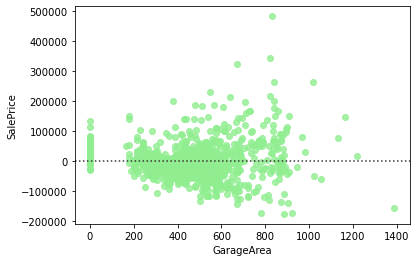

In [154]:
# Residual Plot
sns.residplot(x='GarageArea',y='SalePrice',data=df, color='lightgreen')

            GarageCars  SalePrice
GarageCars    1.000000   0.659351
SalePrice     0.659351   1.000000


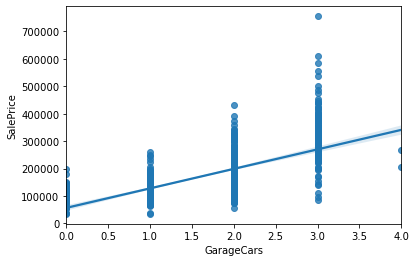

In [155]:
#plotting regression plots with price for individual features
print(df[['GarageCars','SalePrice']].corr())
sns.regplot(x='GarageCars',y='SalePrice',data=df)
#kept

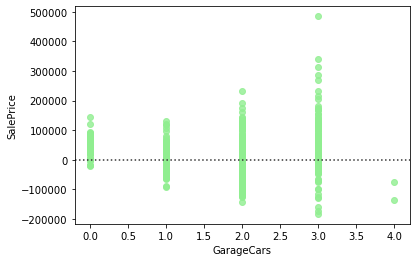

In [156]:
# Residual Plot
sns.residplot(x='GarageCars',y='SalePrice',data=df, color='lightgreen')

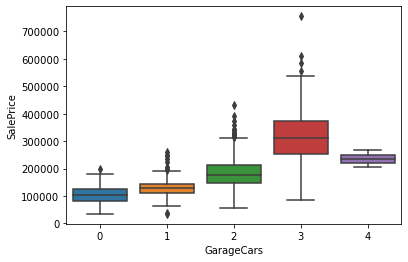

In [157]:
sns.boxplot(x='GarageCars',y='SalePrice',data=df)

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.324023
SalePrice     0.324023   1.000000


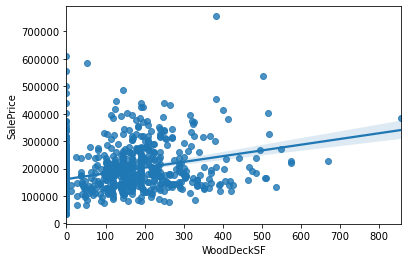

In [158]:
#plotting regression plots with price for individual features
print(df[['WoodDeckSF','SalePrice']].corr())
sns.regplot(x='WoodDeckSF',y='SalePrice',data=df)
#dropped

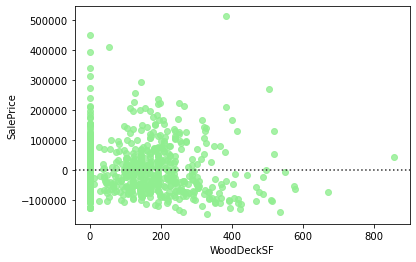

In [159]:
# Residual Plot
sns.residplot(x='WoodDeckSF',y='SalePrice',data=df, color='lightgreen')

In [160]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['WoodDeckSF'],axis=1,inplace=True)
dft.drop(['WoodDeckSF'],axis=1,inplace=True)

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.323092
SalePrice       0.323092   1.000000


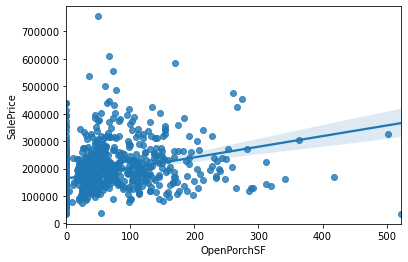

In [161]:
#plotting regression plots with price for individual features
print(df[['OpenPorchSF','SalePrice']].corr())
sns.regplot(x='OpenPorchSF',y='SalePrice',data=df)
#dropped

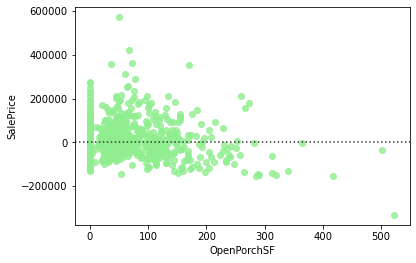

In [162]:
# Residual Plot
sns.residplot(x='OpenPorchSF',y='SalePrice',data=df, color='lightgreen')

In [163]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['OpenPorchSF'],axis=1,inplace=True)
dft.drop(['OpenPorchSF'],axis=1,inplace=True)

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.119103
SalePrice          -0.119103   1.000000


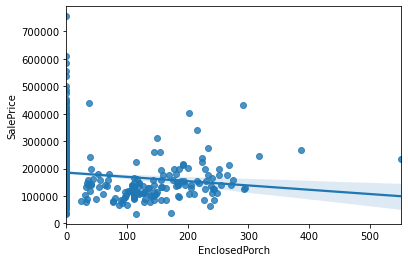

In [164]:
#plotting regression plots with price for individual features
print(df[['EnclosedPorch','SalePrice']].corr())
sns.regplot(x='EnclosedPorch',y='SalePrice',data=df)
#dropped

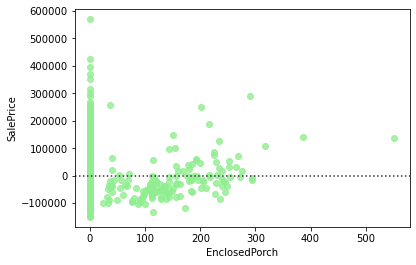

In [165]:
# Residual Plot
sns.residplot(x='EnclosedPorch',y='SalePrice',data=df, color='lightgreen')

In [166]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['EnclosedPorch'],axis=1,inplace=True)
dft.drop(['EnclosedPorch'],axis=1,inplace=True)

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.010098
SalePrice   0.010098   1.000000


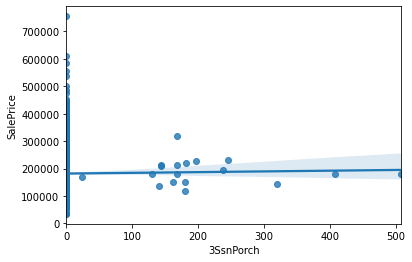

In [167]:
#plotting regression plots with price for individual features
print(df[['3SsnPorch','SalePrice']].corr())
sns.regplot(x='3SsnPorch',y='SalePrice',data=df)
#dropped

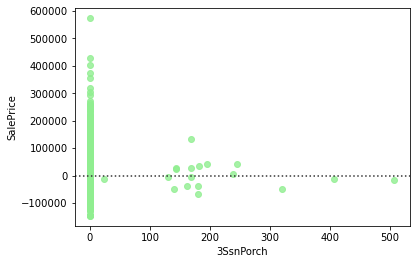

In [168]:
# Residual Plot
sns.residplot(x='3SsnPorch',y='SalePrice',data=df, color='lightgreen')

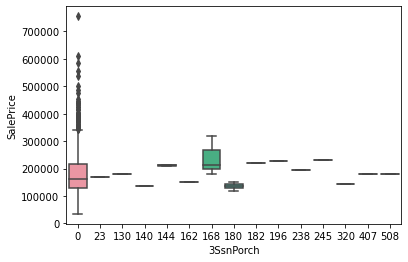

In [169]:
sns.boxplot(x='3SsnPorch',y='SalePrice',data=df)

In [170]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['3SsnPorch'],axis=1,inplace=True)
dft.drop(['3SsnPorch'],axis=1,inplace=True)

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.138563
SalePrice       0.138563   1.000000


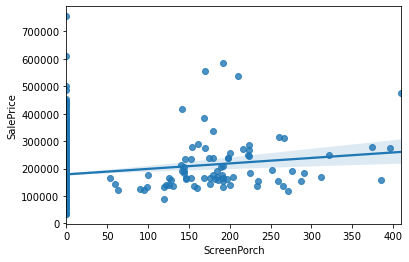

In [171]:
#plotting regression plots with price for individual features
print(df[['ScreenPorch','SalePrice']].corr())
sns.regplot(x='ScreenPorch',y='SalePrice',data=df)
#dropped

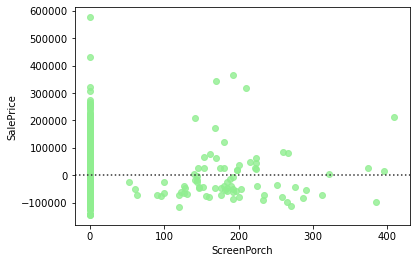

In [172]:
# Residual Plot
sns.residplot(x='ScreenPorch',y='SalePrice',data=df, color='lightgreen')

In [173]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['ScreenPorch'],axis=1,inplace=True)
dft.drop(['ScreenPorch'],axis=1,inplace=True)

           PoolArea  SalePrice
PoolArea   1.000000   0.012638
SalePrice  0.012638   1.000000


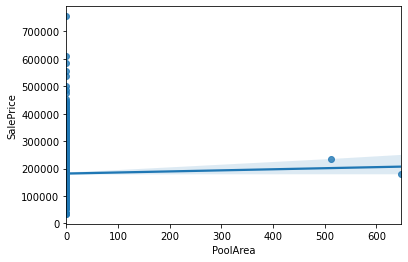

In [174]:
#plotting regression plots with price for individual features
print(df[['PoolArea','SalePrice']].corr())
sns.regplot(x='PoolArea',y='SalePrice',data=df)
#dropped

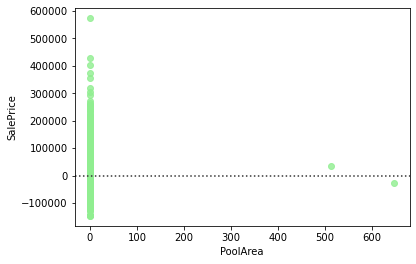

In [175]:
# Residual Plot
sns.residplot(x='PoolArea',y='SalePrice',data=df, color='lightgreen')

In [176]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['PoolArea'],axis=1,inplace=True)
dft.drop(['PoolArea'],axis=1,inplace=True)

            MiscVal  SalePrice
MiscVal    1.000000  -0.039169
SalePrice -0.039169   1.000000


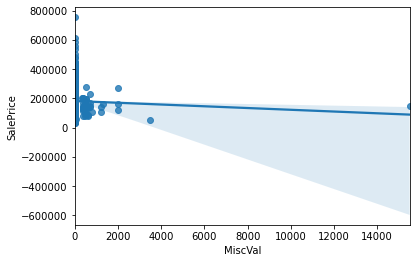

In [177]:
#plotting regression plots with price for individual features
print(df[['MiscVal','SalePrice']].corr())
sns.regplot(x='MiscVal',y='SalePrice',data=df)
#dropped

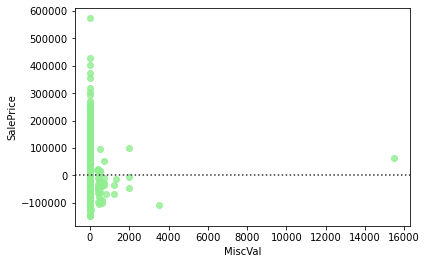

In [178]:
# Residual Plot
sns.residplot(x='MiscVal',y='SalePrice',data=df, color='lightgreen')

In [179]:
# Low corrlation and scatter plot not showing variables are dopped
df.drop(['MiscVal'],axis=1,inplace=True)
dft.drop(['MiscVal'],axis=1,inplace=True)

In [180]:
df=df.dropna()

## Creating Feature Set and Normalizaing Data

In [181]:
X=df.loc[:, df.columns != 'SalePrice']
X=X.loc[:, X.columns != 'Id']
y=df['SalePrice']
X_pred=dft.loc[:, dft.columns != 'Id']

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (712, 94) (712,)
Test set: (238, 94) (238,)


In [183]:
# Normalizaing Data
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)

## Predicting

### Multiple Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [185]:
y_hat=lm.predict(x_test)

In [186]:
y_test.shape

(238,)

In [187]:
lm.score(x_test,y_test)

0.8747815199030213

### Random Forest Regressor

In [188]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [189]:
regressor.score(x_test,y_pred)

1.0

In [190]:
#Managing The Nan Values in Prediction Data
XN=X_pred.copy()
XN["GarageYrBlt"]= XN["GarageYrBlt"].fillna(XN.GarageYrBlt.mean()) 
XN.shape

(439, 94)

## Saving Files

In [191]:
y_sub=regressor.predict(XN)
my_submission = pd.DataFrame({'Id': dft.Id, 'SalePrice': y_sub})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_Random_Forest.csv', index=False)

In [192]:
y_sub =lm.predict(XN)
my_submission = pd.DataFrame({'Id': dft.Id, 'SalePrice': y_sub})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_Linear_Regression.csv', index=False)